<a href="https://colab.research.google.com/github/YevheniiPotapenko/Files/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_6_%D0%9F%D0%BE%D1%82%D0%B0%D0%BF%D0%B5%D0%BD%D0%BA%D0%B0_%D0%84%D0%B2%D0%B3%D0%B5%D0%BD%D0%B0_%D0%9E%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80%D0%BE%D0%B2%D0%B8%D1%87%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторна робота 6, Потапенка Євгена Олександровича, Група ФІТ 2-15.

Інтерполяційний багаточлен Лагранжа

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, expand

In [49]:
import numpy as np

# Задано нові масиви x та y
x = np.array([-1., 0., 1., 3.], dtype=float)
y = np.array([-1., -8., -3., 25.], dtype=float)

x1 = -0.5# точка, в якій потрібно обчислити значення
x2 = 0.5
x3 = 1.5
x4 = 2.5

def lagrange_interpolation(x, y, x_test):
    n = len(x)
    p = np.zeros(n) # масив для зберігання значень багаточленів L_i
    for i in range(n):
       # обчислюємо багаточлен L_i, який складається з n членів
        # кожен член дорівнює  (x-x_j)/(x_i-x_j) для j=0..n, j!=i
        p_i = 1
        for j in range(n):
            if i != j:
                p_i *= (x_test - x[j]) / (x[i] - x[j])
        p[i] = p_i
    return np.dot(y, p) # повертаємо значення багаточлена

# обчислюємо інтерполяційний багаточлен та його значення у точці x_test
f1 = lagrange_interpolation(x, y, x1)
f2 = lagrange_interpolation(x, y, x2)
f3 = lagrange_interpolation(x, y, x3)
f4 = lagrange_interpolation(x, y, x4)

print("Значення функції у точці x_1 =", round(f1, 4))
print("Значення функції у точці x_2 =", round(f2, 4))
print("Значення функції у точці x_3 =", round(f3, 4))
print("Значення функції у точці x_4 =", round(f4, 4))



Значення функції у точці x_1 = -6.2812
Значення функції у точці x_2 = -6.7188
Значення функції у точці x_3 = 2.5938
Значення функції у точці x_4 = 17.1562


<ipython-input-50-cdbda17e5920>:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


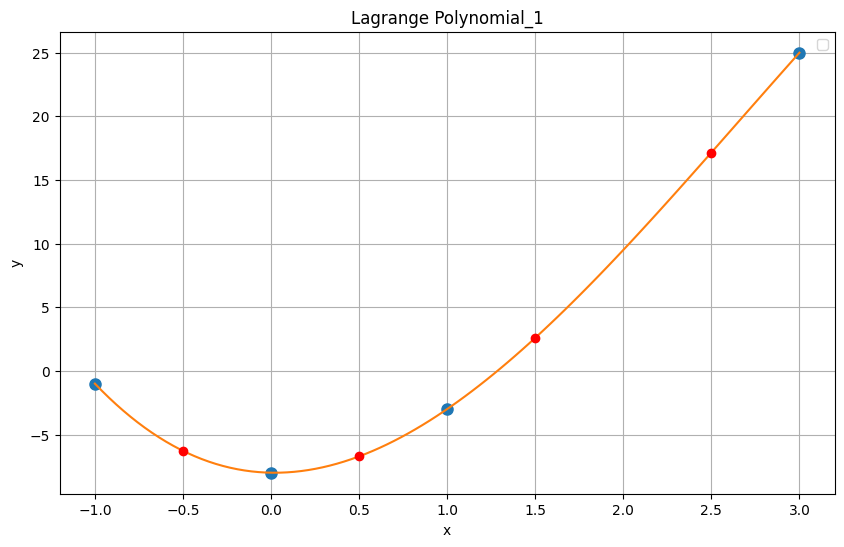

In [50]:

xnew = np.linspace(np.min(x), np.max(x), 100) #точки, за якими будуємо графік
ynew = [lagrange_interpolation(x, y, i) for i in xnew]


plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', markersize=8)
plt.plot(xnew, ynew)

plt.plot(x1, f1, 'ro')#будуємо графік функції Лагранжа
plt.plot(x2, f2, 'ro')
plt.plot(x3, f3, 'ro')
plt.plot(x4, f4, 'ro')


plt.xlabel('x')
plt.ylabel('y')

plt.title('Lagrange Polynomial_1')
plt.grid(True)
plt.legend()
plt.show()


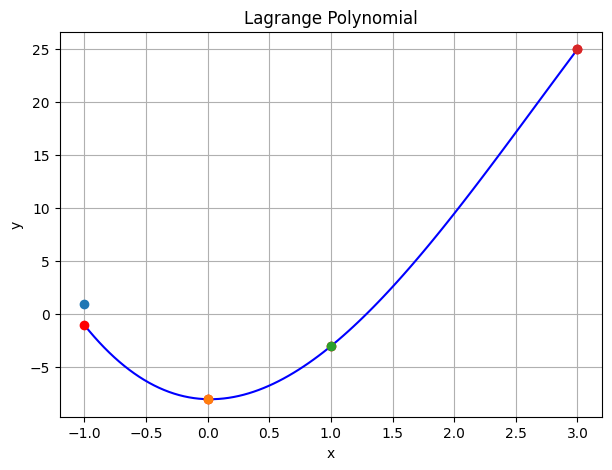

In [51]:
from scipy.interpolate import lagrange
#Перевірка
f = lagrange(x, y)
xnew = np.linspace(-1, 3, 100)

fig =plt.figure(figsize=(7,5))
plt.plot(xnew, f(xnew), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')

plt.plot(-1,1,'o')
plt.plot(0,-8,'o')
plt.plot(1,-3,'o')
plt.plot(3,25,'o')

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Приклад

In [52]:
from scipy.interpolate import lagrange

# Таблиця значень функції
x = np.array([-1., 0., 1., 3.], dtype=float)
y = np.array([-1., -8., -3., 25.], dtype=float)

d = len(x)
a = []
L = []

# Формуємо коефіцієнти та складові частини полінома
for j in range(d):
    p = 1
    s = ''
    for i in range(d):
        if i == j:
            continue
        p *= (x[j] - x[i])
        s += '(x-{})'.format(x[i])
    a.append(y[j]/p)
    L.append(s)

# Формуємо поліном
polynom = 'L(x) = '
for i in range(d):
    polynom += '{:.4f}*{} + '.format(a[i], L[i])
polynom = polynom[:-3]



# Відображаємо поліном
print('Інтерполяційний поліном Лагранжа')
print(polynom_string)

Інтерполяційний поліном Лагранжа
L(x) = 0.9870714285714286*(x-0.5)(x-1)(x-2)(x-3.5)(x-4)(x-6)-4.732629148629148*(x-0)(x-1)(x-2)(x-3.5)(x-4)(x-6)+9.189386666666666*(x-0)(x-0.5)(x-2)(x-3.5)(x-4)(x-6)-7.8307777777777785*(x-0)(x-0.5)(x-1)(x-3.5)(x-4)(x-6)+4.120198095238095*(x-0)(x-0.5)(x-1)(x-2)(x-4)(x-6)-1.8937142857142857*(x-0)(x-0.5)(x-1)(x-2)(x-3.5)(x-6)+0.05695484848484848*(x-0)(x-0.5)(x-1)(x-2)(x-3.5)(x-4)


       3     2
-0.75 x + 6 x - 0.25 x - 8


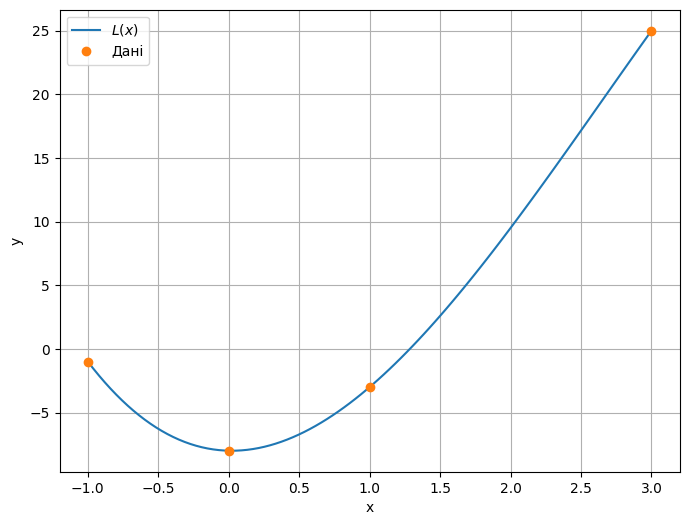

In [53]:

# Таблиця значень функції
x = np.array([-1., 0., 1., 3.], dtype=float)
y = np.array([-1., -8., -3., 25.], dtype=float)

# Інтерполяційний поліном Лагранжа
p = lagrange(x, y)
print(p)

# Формуємо точки для відображення полінома
z = np.linspace(np.min(x), np.max(x), 100)

# Відображаємо поліном та задані точки
plt.figure(figsize=(8, 6))
plt.plot(z, p(z), '-', label='$L(x)$')
plt.plot(x, y, 'o', label='Дані')

plt.legend()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title
plt.show()

Висновок: Виконавши лабораторну роботу, я познайомився/та зрозумів основи щодо роботи  з інтерполяційним багаточленом Лагранжа.